# Introduction

For materials discovery and development, we desire a non-contact method for estimating the density and mobility of electronic and ionic carriers in a thin-film semiconductor.  One approach is to use scanning probe microscopy.  A charged microcantilever over a semiconductor experiences non-contact[@Denk1991oct; @Stowe1999nov] and contact[@Park2007aug; @Qi2008may] friction proportional to dopant concentration. Early attempts to connect this friction to charge density and mobility were heuristic[@Denk1991oct; @Stowe1999nov; @Park2014jan], and therefore only partially successful at explaining the dependence of friction on tip and sample parameters.  

Motivated by this work, Lekkala, Loring, and coworkers developed a rigorous method for computing cantilever friction and frequency noise over a semiconductor.[@Lekkala2012sep; @Lekkala2013nov]  In their treatment the tip was approximated as a moving point charge while the sample was treated as a thin-film dielectric containing mobile carriers. Maxwell's equations were used to compute the reaction field resulting from the oscillating tip charge. Electric field fluctuations giving rise to friction, and electric field gradient fluctuations giving rise to frequency noise, were computed from the Fourier transform of the reaction field *via* a fluctuation-dissipation-theorem relation. 

Lekkala and Loring's theory revealed a suppression of electric field fluctuations over a semiconductor due to charge-charge interactions at moderate to high charge density.  The theory successfully predicted (1) the lack of cantilever frequency fluctuations over an organic field effect transistor[@Lekkala2012sep] and (2) the inverse square-root dependence of friction on doping density,[@Stowe1999nov] in addition to estimating the size of dopant-induced friction correctly.  In the limit of low carrier density, the theory correctly predicts the dependence of non-contact friction[@Kuehn2006apr; @Kuehn2006aug] and frequency noise[@Yazdanian2009jun; @Hoepker2011dec] on sample dielectric constant, sample thickness, and tip-sample separation. 

Tirmzi, Dwyer, and co-workers showed that a broadband local dielectric spectroscopy (BLDS) experiment[@Labardi2016may] could be used to infer semiconductor conductivity and study its dependence on light intensity.[@Tirmzi2017feb] In this experiment the tip charge is oscillated by applying sinusoidal voltage to cantilever. The average cantilever frequency is measured and plotted versus the oscillation frequency to yield a $R C$-like spectrum whose roll-off frequency is proportional to sample conductivity.
Dwyer and coworkers developed a Largrangian mechanics description of the BLDS experiment[@Dwyer2019jun] that explained the non-monotonic dependence of the BLDS spectrum and friction on light intensity, but the theory predicted a height dependence of the frequency shift that is in poor agreement with experiment.

Building on prior work,[@Lekkala2012sep; @Lekkala2013nov] Loring has developed a linear-response treatment of the BLDS frequency shift. This theory correctly predicts the dependence of the BLDS spectrum on conductivity and charge density, but the predicted height dependence is in only qualitative agreement with experiment.  This only-qualitative agreement is likely caused by modeling the tip as a single point charge.

To move beyond the point-charge approximation is a seemingly formidable task. The standard way to numerically estimate the capacitance of a cantilever tip is the boundary-element method.[@Xu2017aug; @Xu2018may]  In this method the tip is divided into $10^{3}$ to $10^{4}$ equal area-segments, and the charges in these segments are varied to obtain an equipotential surface.  Computing the tip-sample force would then require integrating electrostatic tip-sample forces over these thousands of optimized surface charges.   

To avoid this costly summation, Xu and coworkers[@Xu2019oct] recently introduced an efficient method for computing the force experienced by a charged cantilever over a semiconductor. In Xu's approach one seeks an optimized set of *image charges* that simultaneously enforce an equipotential condition on the cantilever and a nearby $(x,y)$ groundplane. Xu and coworkers considered a cylindrically symmetric cantilever consisting of a long conical tip terminated by a sphere.  Image charges were placed inside the (partial) sphere at locations expected for a charged sphere near a ground plane.  Additional image charges were placed at equally spaced intervals along the cone axis.  The potential was minimized over a set of voltage test-points located on the cantilever surface, with the number of volage-test points set equal to the number of images charges.  Using this approach, Xu found that the force between the cantilever and a semiconductor could be computed using just a few image charges located inside the cantilever along the $z$ axis. 

Here we present two studies.

1. We use Xu's general approach to numerically compute the capacitance, and capacitance first and second derivatives, of a sphere over a ground plane.  In contrast with Xu, we place image charges at equally spaced locations along the $z$ axis.  The voltage-test points are equally distributed around the sphere, and the number of voltage-test points can be greater than the number of image-charge points.  The minimization problem is now overdetermined, and image charges are optimized using singular value decomposition.  The resulting optimized image charge density shows the expected peaks at the sphere center and additional locations when the sphere is near a ground plane.  Numerical results for the capacitance and capacitance derivatives show part-per-million agreement with known analytical formulas.

2. We reproduce Xu et al.'s calculations exactly, regenerating a plot from Fig. 3 in their manuscript.[@Xu2019oct]

These studies demonstrate that we have coded up Xu's algorithm correctly.  As a further check, we compare values of tip-sample force determined in the second study to analytical formulas for the force given by Hudlet and coworkers.[@Hudlet1998mar]  We note that Hudlet et al's formulas for the *capacitance* are suspect, because they predict that the capacitance of a sphere infinitely far away from a ground plane is zero, when in fact it is $4 \pi \epsilon_0 r$, with $r$ the tip radius.


It should be relatively straightforward to adapt the code below to model the force and force gradients over a semiconductor, using Loring's new analysis of the tip-sample interaction and replacing Xu's Green's function with Lekkala and Loring's response function.

::: {#refs}
:::

# Methods

## A set of linear equations for the charges

Because of the cylindrical symmetry of the tip, we can perform simulations in two dimensions, with tip charges placed in the $(x,z)$ plane.  The potential $\phi$ at location $\boldsymbol{s}_k$ due to a set of charges $q_1, q_2, \ldots, q_M$ at locations $\boldsymbol{r}_1, \boldsymbol{r}_2, \ldots, \boldsymbol{r}_N$ is

$$
\phi(\boldsymbol{s}_k) = \frac{1}{4 \pi \epsilon_0} \sum_{j=1}^{N} q_j G(\boldsymbol{s}_k, \boldsymbol{r}_j)
$$

with $G$ a Green's function. For charges over a ground plane at $z = 0$, the Green's function is given by

$$
G(\boldsymbol{s}_k, \boldsymbol{r}_j) 
 = \frac{1}{\sqrt{(s^x_k - r^x_j)^2 + (s^z_k - r^z_j))^2}}
   - \frac{1}{\sqrt{(s^x_k - r^x_j)^2 + (s^z_k + r^z_j))^2}}
$$ {#eq-G}

The first term is the potential due to the charge $q_j$ at location $(r^x, 0, r^z)$ while the second term is due to the image charge $-q_j$ at $(r^x_j, 0, -r^z_j)$.  The two terms in {@eq-G} enforce the $\phi = 0$ condition at $z = 0$, the location of the ground plane.  Consider a tip modeled with two charges, $q_1$ and $q_2$, located at $\boldsymbol{r}_1$ and $\boldsymbol{r}_2$, respectively. Let us solve for these charges by minimizing the potential at three voltage-test points on the surface of the tip $\boldsymbol{s}_1$, $\boldsymbol{s}_2$, and $\boldsymbol{s}_3$.  This minimization procedure leads to the following set of simultaneous equations:

$$
\begin{pmatrix} 
  \phi(\boldsymbol{s}_1) \\
  \phi(\boldsymbol{s}_2) \\
  \phi(\boldsymbol{s}_2)
\end{pmatrix} = 
\frac{1}{4 \pi \epsilon_0}
\begin{pmatrix}
G(\boldsymbol{s}_1, \boldsymbol{r}_1) & G(\boldsymbol{s}_1, \boldsymbol{r}_2) \\
G(\boldsymbol{s}_2, \boldsymbol{r}_1) & G(\boldsymbol{s}_2, \boldsymbol{r}_2) \\
G(\boldsymbol{s}_3, \boldsymbol{r}_1) & G(\boldsymbol{s}_3, \boldsymbol{r}_2)
\end{pmatrix}
\begin{pmatrix} 
  q_1 \\
  q_2
\end{pmatrix}.
$$ {#eq-presystem}

We wish to invert this set of simultaneous equations to obtain the charges $q_1$ and $q_2$.

## Write the equations in unitless form

Let us write the potential as $\phi = \phi_{\mathrm{ref}} \hat{\phi}$, with $\hat{\phi}$ a unitless potential and $\phi_{\mathrm{ref}} = 1 \: \mathrm{V}$ a reference potential and the charge as $q_j = q_e \hat{q}_j$, with $\hat{q}_j$ a unitless charge density and $q_e$, the unit of electron charge.  In the Green's function, let us write $\boldsymbol{s}_k = x_{\mathrm{ref}} \hat{\boldsymbol{s}}_k$ and $\boldsymbol{r}_j = x_{\mathrm{ref}} \hat{\boldsymbol{r}}_j$, with $\hat{\boldsymbol{s}}_k$ and $\hat{\boldsymbol{r}}_j$ unitless distances and $x_{\mathrm{ref}} = 1 \: \mathrm{nm}$ a reference distance.  With these substitutions, {@eq-presystem} can be written as

$$
\hat{\boldsymbol{\phi}} = \hat{\boldsymbol{R}} \cdot \hat{\boldsymbol{q}}
$$ {#eq-system}

with $\boldsymbol{R} = c_G \hat{\boldsymbol{G}}$ a response matrix and 

$$
c_G = \frac{q_e}{4 \pi \epsilon_0 \phi_{\mathrm{ref}} x_{\mathrm{ref}}} = 1.43996
$$

a unitless constant. The associated response function is given by

$$
R(\hat{\boldsymbol{s}}_k, \hat{\boldsymbol{r}}_j) 
 = c_G \left( 
 \frac{1}{\sqrt{(\hat{s}^x_k - \hat{r}^x_j)^2 + (\hat{s}^z_k - \hat{r}^z_j))^2}}
   - \frac{1}{\sqrt{(\hat{s}^x_k - \hat{r}^x_j)^2 + (\hat{s}^z_k + \hat{r}^z_j))^2}}
 \right),
$$

which is essentially the Green's function written in terms of unitless parameters.  In the above equation we are using superscripts to indicate the $x$ and $z$ components of the $\boldsymbol{s}$ and $\boldsymbol{r}$ vectors.

## Solve the simultaneous equations for the charges

{@eq-system} is a set of overdetermined simultaneous equations.  We invert {@eq-system} using a singular value decomposition to write the pseudo-inverse of $\boldsymbol{R}$.  This inversion gives a least-squares solution to {@eq-system}. The singular value decomposition is given by

$$
\boldsymbol{R} = \boldsymbol{U} \cdot \boldsymbol{\Sigma} \cdot \boldsymbol{V}^{\mathrm{T}}
$$

with $\boldsymbol{U}$ the eigenvector matrix diagonalizing $\boldsymbol{R} \cdot \boldsymbol{R}^{\mathrm{T}}$, $\boldsymbol{U}$ the eigenvector matrix diagonalizing $\boldsymbol{R}^{\mathrm{T}} \cdot \boldsymbol{R} $, and $\boldsymbol{\Sigma} = \mathrm{diag}(\sigma_1, \sigma_2, \ldots, \sigma_N)$ a diagonal matrix of singular values.  The pseudo-inverse of $\hat{\boldsymbol{G}}$ is

$$
\boldsymbol{R}^{\dagger} = \boldsymbol{V}^{\mathrm{T}} \cdot \boldsymbol{\Sigma}^{\dagger} \cdot \boldsymbol{U}
$$

where $\boldsymbol{\Sigma}^{\dagger}$ is the pseudo-inverse of $\boldsymbol{\Sigma}$, formed below by applying a filter to the singular values.  Below we apply the filter
$f_j = \sigma_j^2 /(\sigma_j^2 + \alpha^2)$ with $\alpha$ a filtering parameter, such that 

$$
\boldsymbol{\Sigma}^{\dagger} 
  = \mathrm{diag} \left( \frac{\sigma_1}{\sigma_1^2 + \alpha^2},
   \frac{\sigma_2}{\sigma_2^2 + \alpha^2}, 
   \ldots, 
   \frac{\sigma_N}{\sigma_N^2 + \alpha^2} \right).
$$

Let the tip be held at a potential of $\phi$, giving

$$
\hat{\boldsymbol{\phi}} = \frac{\phi}{\phi_{\mathrm{ref}}}
 \underbrace{(1, 1, \ldots, 1)^{\mathrm{T}}}_{\boldsymbol{1}_{M}^{\mathrm{T}}}
$$

Using the pseuso-inverse to solve {@eq-system} gives the charge values

$$
\hat{\boldsymbol{q}} 
 = \frac{\phi}{\phi_{\mathrm{ref}}} \: 
   \boldsymbol{R}^{\dagger} \cdot \boldsymbol{1}_{M}.
$$

## Capacitance and capacitance derivatives

Having solved for the charges, we can compute the capacitance as

$$
C = \frac{q_e}{\phi} \sum_{j=1}^{N} \hat{q}_j
 = \frac{q_e}{\phi_{\mathrm{ref}}} 
 \boldsymbol{1}_{N}^{\mathrm{T}} 
   \cdot \boldsymbol{R}^{\dagger} 
   \cdot \boldsymbol{1}_{M}
$$ {#eq-C}

Assuming a tip voltage of $\phi = 1 \: \mathrm{V}$, the prefactor in the above equation evaluates to $q_e/\phi = 1.6022 \times 10^{-19} \: \mathrm{F} = 0.16022 \: \mathrm{aF}$.

To compute capacitance derivatives, we need the following two matrix relations.  Let $\boldsymbol{R}^{-1}$ be the inverse of the non-square matrix $\boldsymbol{R}$.  Suppose that the matrix $\boldsymbol{R}$ depends on the parameter $z$.  We can derive
the following two useful relations by differentiating $\boldsymbol{R} \boldsymbol{R}^{-1}$:

$$
\frac{\partial \boldsymbol{R}^{-1}}{\partial z}
 = - \boldsymbol{R}^{-1} 
   \cdot \frac{\partial \boldsymbol{R}}{\partial z}
   \cdot \boldsymbol{R}^{-1}
$$

and

$$
\frac{\partial^2 \boldsymbol{R}^{-1}}{\partial z^2}
 = - \boldsymbol{R}^{-1} 
   \cdot \frac{\partial^2 \boldsymbol{R}}{\partial z^2}
   \cdot \boldsymbol{R}^{-1}
+ 2 \boldsymbol{R}^{-1} 
  \cdot \frac{\partial \boldsymbol{R}}{\partial z}
  \cdot \boldsymbol{R}^{-1}
  \cdot \frac{\partial \boldsymbol{R}}{\partial z}
  \cdot \boldsymbol{R}^{-1}.
$$

These two equations relate the first and second derivatives of the *inverse* of a matrix to the first and second derivaties of the matrix.  We will apply these relations, taking $\boldsymbol{R}^{-1} \rightarrow \boldsymbol{R}^{\dagger}$.  

We want to compute the derivative of the capacitance with respect to the tip-sample separation $z$.  Both the voltage-test locations $\boldsymbol{s}_k$ and the the charge locations $\boldsymbol{r}_j$ depend on $z$.  So we must apply the chain rule, using

$$
\frac{\partial R}{\partial z}
 = \frac{\partial R}{\partial s^z_k} 
   \frac{\partial s^z_k}{\partial z}
+ \frac{\partial R}{\partial r^z_j} 
   \frac{\partial r^z_j}{\partial z}
$$

with $\partial s^z_k / \partial z = 1$ and $\partial r^z_j / \partial z = 1$.  Applying the chain rule we obtain, after considerable simplification,

$$
\frac{\partial R}{\partial z} = \frac{2}{x_0} 
\frac{\hat{s}^z_k + \hat{r}^z_j}
     {\left((\hat{s}^x_k - \hat{r}^x_j)^2 + (\hat{s}^z_k + \hat{r}^z_j)^2\right)^{3/2}}
$$

and 

$$
\frac{\partial^2 R}{\partial z^2} = \frac{1}{x_0^2} \left( 
\frac{\hat{s}^z_k + \hat{r}^z_j}
     {\left((\hat{s}^x_k - \hat{r}^x_j)^2 + (\hat{s}^z_k + \hat{r}^z_j)^2\right)^{3/2}}
-  
\frac{12 \left( \hat{s}^z_k + \hat{r}^z_j \right)^2}
     {\left((\hat{s}^x_k - \hat{r}^x_j)^2 + (\hat{s}^z_k + \hat{r}^z_j)^2\right)^{5/2}}
\right).
$$

The above relations are used in conjuction with {@eq-C} to obtain the capacitance derivaties $\partial C / \partial z$ and $\partial^2 C / \partial z^2$.

# Coding preliminaries

Import Python packages and define default plotting parameters.  We use the package `dissipationtheory` to calculate the capacitance (and capacitance derivatives) of a sphere.

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

In [2]:
%matplotlib inline
import matplotlib.pylab as plt

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)
plt.rcParams['figure.figsize'] = 3.25, 3.5

In [3]:
from dissipationtheory.constants import ureg, epsilon0, qe
from dissipationtheory.capacitance import Csphere

In [4]:
THIS = 'dissipation-theory--Study-33--'
figs = {}

# Define a spherical object

In the code below we define the object `twodimCobject` with member functions

* `addsphere`, 
* `response_metal`, 
* `solve`, and 
* `plot`.

In [5]:
class twodimCobject():

    def addsphere(self, r, h, Nz, Nr):
        """Model a sphere of radius $r$ above a ground plane, with a tip-sample
        separation of $h$.  Create image-charge points $r_j$ and voltage-test 
        points $r_k$.  The $N_z$ image-charge points are placed along a verical
        line extending from $h + 0.1 r$ to $h + 1.90 r$. The $N_r$ voltage-test 
        points are located uniformly around the sphere, starting at the south 
        pole, $\theta = -\pi/2$, and rotating counter clockwise. Initialize the
        values of the image charges at 1.0."""

        # convert to nm and strip units
        h = h.to('nm').magnitude
        r = r.to('nm').magnitude

        # charge locations
        delta_array = np.linspace(start=-0.90, stop=0.90, endpoint=True, num=Nz)
        self.rj = np.array([[0, h + r + r * delta] for delta in delta_array])

        # voltage-test locations
        theta_array = np.linspace(start=-np.pi/2, stop=3*np.pi/2, endpoint=False, num=Nr)
        self.rk = np.array([[r * np.cos(theta), h + r + r * np.sin(theta)] for theta in theta_array])
        
        # save these
        self.info = {'type': 'sphere', 'r': r, 'h': h, 'Nz': Nz, 'Nr': Nr }
        self.title1 = f'sphere, $r$ = {r:0.1f} nm, $h$ = {h:0.1f} nm, $N_z$ = {Nz:d}, $N_r$ = {Nr:d}'
        self.title2 = ''

        # initialize the results, useful for plotting
        self.results = {
            'alpha': 0, 
            'q': np.ones(Nz),
            'S': np.ones(Nz),
            'Sinv': np.ones(Nz),
            'cn': 0, 
            'V': np.zeros(Nr),
            'C0': ureg.Quantity(0, 'F'),
            'C1': ureg.Quantity(0, 'F/m'),
            'C2': ureg.Quantity(0, 'F/m^2')}
        
    def response_metal(self):
        """Creates the response function, the matrix you multiply the charges
        by to get the voltages.  The model below assumes a metallic plane
        at $z = 0$, which gives rise to a set of images charges.  For charges
        in units of $q_e$, the electronic charge, the voltages will be in 
        units of volts.  In the code below, 

            $r_k$ -- voltage-test points
            $r_j$ -- image-charge points
            
        """

        # shorthand
        rk = self.rk
        
        # reverse the z-coordinates to get the locations of the image charges
        rjp = self.rj
        rjm = np.array([self.rj[:,0], -self.rj[:,1]]).T
        
        # unit matrices
        Idk = np.ones_like(rk[:,0])
        Idj = np.ones_like(rjp[:,0])

        # locations of positive and minus (i.e. image) charges
        
        dxp = np.outer(rk[:,0], Idj.T) - np.outer(Idk, rjp[:,0].T)
        dzp = np.outer(rk[:,1], Idj.T) - np.outer(Idk, rjp[:,1].T)
        
        dxm = np.outer(rk[:,0], Idj.T) - np.outer(Idk, rjm[:,0].T)
        dzm = np.outer(rk[:,1], Idj.T) - np.outer(Idk, rjm[:,1].T)

        # compute unitless constant
        V0 = ureg.Quantity(1, 'V')
        x0 = ureg.Quantity(1, 'nm')
        kR = (qe / (4 * np.pi * epsilon0 * V0 * x0)).to('').magnitude

        # response functions
        
        self.R = kR * (np.power(dxp**2 + dzp**2, -1/2) 
                     - np.power(dxm**2 + dzm**2, -1/2))

        self.R1 = kR * 2 * dzm * np.power(dxm**2 + dzm**2, -3/2)

        self.R2 = kR * (4 * np.power(dxm**2 + dzm**2, -3/2)
                          - 12 * dzm**2 * np.power(dxm**2 + dzm**2, -5/2))
        
        # initial voltage guess
        self.results['V'] = np.dot(self.R, self.results['q'])

    def solve(self, alpha=0.):
        """Solve for the charges.  The parameter $\alpha$ is used to filter
        the singular values in the inverse.         
        """

        U, S, VT = np.linalg.svd(self.R, full_matrices=False)

        filt = np.diag(np.power(S, 2)/(np.power(S, 2) + alpha**2))
        Sinv = filt * np.diag(np.power(S, -1)) 
        Rinv = np.dot(np.dot(VT.T, Sinv), U.T)
              
        IdNr = np.ones(self.info['Nr'])
        q0 = np.dot(Rinv, IdNr)
        q1 = - np.dot(np.dot(np.dot(Rinv, self.R1), Rinv), IdNr) 
        q2 = - np.dot(np.dot(np.dot(Rinv, self.R2), Rinv), IdNr) \
             + 2 * np.dot(np.dot(Rinv, np.dot(self.R1, np.dot(Rinv, np.dot(self.R1, Rinv)))), IdNr)
        
        # save for diagnosis
        self.Rinv = Rinv       
            
        # constants
        V0 = ureg.Quantity(1, 'V')
        x0 = ureg.Quantity(1, 'nm')
        kc0 = (qe / V0).to('aF')
        kc1 = (kc0 / x0).to('F/m')
        kc2 = (kc1 / x0).to('F/m^2')
        
        # derived quantities
        self.results['S'] = S                    # unitless
        self.results['Sinv'] = np.diagonal(Sinv) # unitless
        self.results['cn'] = S.max()/S.min()     # unitless
        self.results['q'] = q0                   # units of qe
        self.results['C0'] = kc0 * q0.sum()      # units of F
        self.results['C1'] = kc1 * q1.sum()      # units of F/m
        self.results['C2'] = kc2 * q2.sum()      # units of F/m^2
        self.results['V'] =  np.dot(self.R, q0)  # units of V

        # recompute the plotting title string
        self.title2 = r'$\alpha$ = {:0.2e}, cn = {:0.2e}, $C_0$ = {:0.4f} aF, $C_1$ = {:0.2e} F/m, $C_2$ = {:0.2e} F/m$^2$'.format(
            self.results['alpha'],
            self.results['cn'], 
            self.results['C0'].to('aF').magnitude,
            self.results['C1'].to('F/m').magnitude,
            self.results['C2'].to('F/m^2').magnitude)
    
    def plot(self, Nj=0, Nr=0):
        """Plot, from left to right, (a) the voltage test points and the computed 
        image charges, (b) the relative voltage error around the object in parts per
        million, (c) image charge value versus position, and (d) singular values 
        for the response-function matrix."""

        if Nj == 0:
            Nj = self.info['Nz']

        if Nr == 0:
            Nr = self.info['Nr']
        
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(8.00, 2.5))
        
        fig.suptitle(self.title1 + '\n' + self.title2, fontsize=10)
    
        cmap = plt.get_cmap('RdBu')
        ax1.scatter(self.rj[0:Nj,0], self.rj[0:Nj,1], 
            marker='.', c=self.results['q'][0:Nj], cmap=cmap, 
            alpha=0.5, edgecolors='face',
            vmin=-max(abs(self.results['q'][0:Nj])), 
            vmax=max(abs(self.results['q'][0:Nj])))
        ax1.scatter(self.rk[0:Nr,0], self.rk[0:Nr,1], marker='.')
        ax1.set_xlabel(r'$\rho$ [nm]')
        ax1.set_ylabel('$z$ [nm]')
        ax1.axis('equal')

        ax2.plot(self.rj[0:Nj,1], self.results['q'][0:Nj], '.-')
        ax2.set_xlabel('$(r_j)_{z}$ [nm]')
        ax2.set_ylabel('$q/q_{e}$')
        ax2.set_title(r''.format(), fontsize=10)
        
        ax3.plot(self.results['V'][0:Nr], '.-')
        ax3.set_xlabel('index')
        ax3.set_ylabel(r'$V$ [V]')
        
        ax4.plot(self.results['S'][0:Nj], label='$\Lambda_k$')
        ax4.plot(self.results['Sinv'][0:Nj], label=r'${\mathrm{filt}}(\Lambda_k^{-1})$')
        ax4.set_xlabel('index $k$')
        ax4.set_ylabel('SVD')
        ax4.set_yscale('log')
        ax4.legend(fontsize=6, frameon=False)
        
        fig.tight_layout()
        
        return fig

# Compute the image charges for a sphere near a ground plane

## Example calculation

An object to hold experiments.

In [6]:
obj = {}

Create the object and plot it.  We should see the voltage-test points, the charge points.  The initial-guess charge is 1 at each charge point.  The initial voltage is zero, and the the singular values are initialized to one.

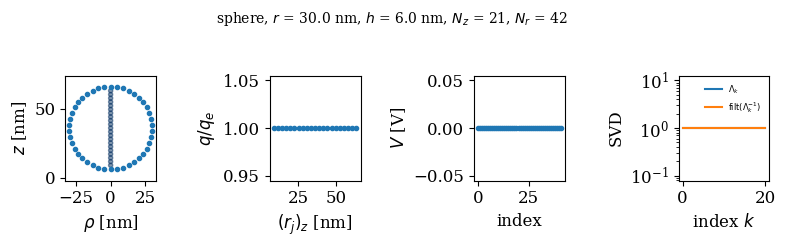

In [7]:
params = {'r': ureg.Quantity(30., 'nm'), 
          'h': ureg.Quantity(6., 'nm'), 
          'Nz': 21, 
          'Nr': 42}

obj['1'] = twodimCobject()
obj['1'].addsphere(**params)
_ = obj['1'].plot()

After we create the response-function matrix, we can compute an initial-guess voltage from the initial-guess charges.

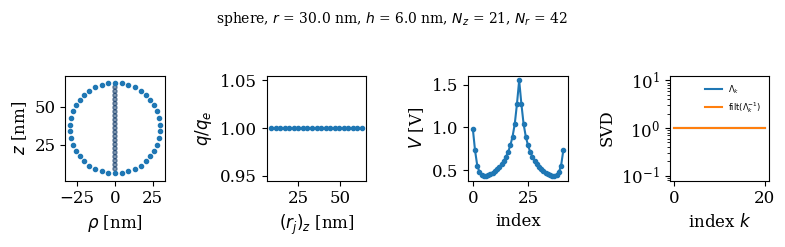

In [8]:
obj['1'].response_metal()
_ = obj['1'].plot()

Solve the inverse problem.  Solve it first without filtering.

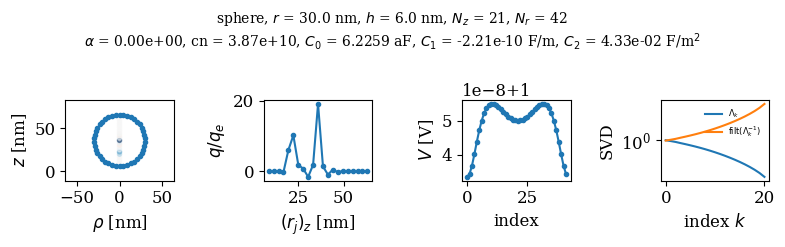

In [9]:
obj['1'].solve()
_ = obj['1'].plot()

Now with filtering.

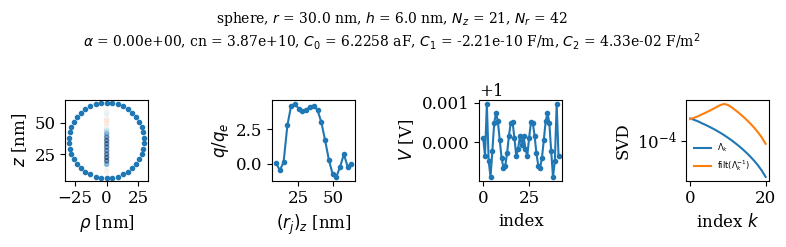

In [10]:
obj['1'].solve(alpha=1e-3)
_ = obj['1'].plot()

With really agressive filtering, $\alpha=0.001$, 

* the charge distribution changes dramatically and
* the voltage errors get markedly worse, from $10^{-7}$ V to $10^{-3}$ V, yet
* the capacitance is *the same* to four significant figures.

So the total charge must not have changed very much.  Interesting!

## Compare $C_n$ vs. $h$ to analytical result

Simulate the capacitance and capacitance first derivative versus height for a sphere over a metal.

In [11]:
comp = {}
calc = {}

r = ureg.Quantity(30., 'nm')
h_array = ureg.Quantity(
    np.logspace(
        start=np.log10(15e-9),
        stop=np.log10(1e-6),
        num=20,
        endpoint=True), 
    'm')

for key, unit in zip(['C0', 'C1', 'C2'], ['aF', 'pF/m', 'mF/m^2']):
    comp[key] = ureg.Quantity(np.zeros_like(h_array), unit)

for index, h in enumerate(h_array):

    params = {'r': r, 
              'h': h, 
              'Nz': 21, 
              'Nr': 42}

    obj['1'] = twodimCobject()
    obj['1'].addsphere(**params)
    obj['1'].response_metal()
    obj['1'].solve()
    
    for key in ['C0', 'C1', 'C2']:
        comp[key][index] = obj['1'].results[key]
    
for key, index, unit in zip(['C0', 'C1', 'C2'], [0, 1, 2], ['aF', 'pF/m', 'mF/m^2']):
    calc[key] = Csphere(index, h_array, r).to(unit)

Print out the results in a Pandas dataframe

In [12]:
df = pd.DataFrame.from_dict(
    {'h [nm]': h_array.to('nm').magnitude, 
     '$C_0$ [aF] comp': comp['C0'].to('aF').magnitude,
     '$C_0$ [aF] calc': calc['C0'].to('aF').magnitude,
     '$\epsilon_{C_0}$ [ppm]': 1e6 * ((comp['C0'] - calc['C0'])/comp['C0']).to('').magnitude,
     '$C_1$ [pF/m] comp': comp['C1'].to('pF/m').magnitude,
     '$C_1$ [pF/m] calc': comp['C1'].to('pF/m').magnitude,
     '$\epsilon_{C_1}$ [ppm]': 1e6 * ((comp['C1'] - calc['C1'])/comp['C1']).to('').magnitude,
     '$C_2$ [mF/m$^2$] comp': comp['C2'].to('mF/m^2').magnitude,
     '$C_2$ [mF/m$^2$] calc': comp['C2'].to('mF/m^2').magnitude,
     '$\epsilon_{C_2}$ [ppm]': 1e6 * ((comp['C2'] - calc['C2'])/comp['C2']).to('').magnitude
    }
)

markdown_table = df.to_markdown()
display(Markdown(markdown_table))

|    |    h [nm] |   $C_0$ [aF] comp |   $C_0$ [aF] calc |   $\epsilon_{C_0}$ [ppm] |   $C_1$ [pF/m] comp |   $C_1$ [pF/m] calc |   $\epsilon_{C_1}$ [ppm] |   $C_2$ [mF/m$^2$] comp |   $C_2$ [mF/m$^2$] calc |   $\epsilon_{C_2}$ [ppm] |
|---:|----------:|------------------:|------------------:|-------------------------:|--------------------:|--------------------:|-------------------------:|------------------------:|------------------------:|-------------------------:|
|  0 |   15      |           5.12499 |           5.12499 |              -0.0778201  |         -70.7238    |         -70.7238    |               0.303498   |             6.23358     |             6.23358     |                1.22928   |
|  1 |   18.7105 |           4.89902 |           4.89902 |              -0.00373117 |         -52.5381    |         -52.5381    |               0.307694   |             3.8415      |             3.8415      |                0.169702  |
|  2 |   23.339  |           4.69071 |           4.69071 |               0.0246414  |         -38.6182    |         -38.6182    |              -0.126057   |             2.34573     |             2.34573     |                0.0509226 |
|  3 |   29.1123 |           4.50076 |           4.50076 |               0.0661329  |         -28.0679    |         -28.0679    |               0.263995   |             1.41727     |             1.41727     |               -0.35686   |
|  4 |   36.3138 |           4.32954 |           4.32954 |               0.026991   |         -20.1609    |         -20.1609    |              -0.106224   |             0.846138    |             0.846138    |                0.692722  |
|  5 |   45.2968 |           4.17703 |           4.17703 |              -0.0270893  |         -14.3085    |         -14.3085    |              -0.15351    |             0.498612    |             0.498612    |               -0.145369  |
|  6 |   56.5018 |           4.04281 |           4.04281 |              -0.136124   |         -10.0345    |         -10.0345    |              -0.179914   |             0.289796    |             0.289796    |               -0.312853  |
|  7 |   70.4787 |           3.92606 |           3.92606 |               0.0164592  |          -6.95647   |          -6.95647   |              -0.141533   |             0.166076    |             0.166076    |               -0.333546  |
|  8 |   87.9129 |           3.82564 |           3.82564 |              -0.196798   |          -4.77061   |          -4.77061   |              -0.325036   |             0.0938636   |             0.0938636   |               -0.458003  |
|  9 |  109.66   |           3.74016 |           3.74016 |              -0.0353734  |          -3.23924   |          -3.23924   |              -0.00442106 |             0.0523547   |             0.0523547   |                0.0360971 |
| 10 |  136.786  |           3.66808 |           3.66808 |              -0.0796262  |          -2.17996   |          -2.17996   |              -0.0222584  |             0.0288485   |             0.0288485   |               -0.241686  |
| 11 |  170.623  |           3.60781 |           3.60781 |               0.229324   |          -1.45569   |          -1.45569   |               0.397339   |             0.0157233   |             0.0157233   |                0.456464  |
| 12 |  212.83   |           3.55777 |           3.55777 |              -0.134557   |          -0.965547  |          -0.965547  |              -0.238057   |             0.00848788  |             0.00848788  |               -0.250484  |
| 13 |  265.478  |           3.51649 |           3.51649 |              -0.130171   |          -0.636806  |          -0.636806  |              -0.0925322  |             0.00454439  |             0.00454439  |               -0.224084  |
| 14 |  331.149  |           3.48261 |           3.48261 |               0.00557376 |          -0.417995  |          -0.417995  |               0.127264   |             0.00241614  |             0.00241614  |                0.113957  |
| 15 |  413.066  |           3.45492 |           3.45492 |              -0.0237813  |          -0.273287  |          -0.273287  |              -0.122311   |             0.00127714  |             0.00127714  |               -0.0308072 |
| 16 |  515.246  |           3.43238 |           3.43238 |              -0.0527344  |          -0.178096  |          -0.178096  |              -0.129197   |             0.000671831 |             0.000671831 |               -0.141565  |
| 17 |  642.702  |           3.41408 |           3.41408 |               0.0829224  |          -0.115753  |          -0.115753  |               0.0405414  |             0.000352016 |             0.000352016 |               -0.0562975 |
| 18 |  801.687  |           3.39926 |           3.39926 |               0.102287   |          -0.0750707 |          -0.0750707 |               0.027911   |             0.000183848 |             0.000183848 |               -0.0744639 |
| 19 | 1000      |           3.38728 |           3.38728 |               0.166032   |          -0.0486009 |          -0.0486009 |               0.257598   |             9.57671e-05 |             9.57671e-05 |                0.25584   |

Make a nice figure.

In [13]:
def compareCs():

    fig, (axT, axB) = plt.subplots(2, 3, 
        figsize=(6.50, 3.5),
        sharex=True, 
        gridspec_kw={'height_ratios': [1, 3]}) 

    opts1 = {'marker': 'o', 'facecolors': 'none', 'edgecolors': 'black'}
    opts2 = {'marker': '.'}

    axT.shape

    axT[0].scatter(df['h [nm]'], df['$\epsilon_{C_0}$ [ppm]'], **opts1)
    axB[0].scatter(df['h [nm]'], df['$C_0$ [aF] comp'], **opts1)
    axB[0].scatter(df['h [nm]'], df['$C_0$ [aF] calc'], **opts2)

    axT[1].scatter(df['h [nm]'], df['$\epsilon_{C_1}$ [ppm]'], **opts1)
    axB[1].scatter(df['h [nm]'], df['$C_1$ [pF/m] comp'], **opts1)
    axB[1].scatter(df['h [nm]'], df['$C_1$ [pF/m] calc'], **opts2)

    axT[2].scatter(df['h [nm]'], df['$\epsilon_{C_2}$ [ppm]'], **opts1)
    axB[2].scatter(df['h [nm]'], df['$C_2$ [mF/m$^2$] comp'], **opts1)
    axB[2].scatter(df['h [nm]'], df['$C_2$ [mF/m$^2$] calc'], **opts2)

    axB[0].set_ylabel('$C_0$ [aF]')
    axB[1].set_ylabel('$C_1$ [pF/m]')
    axB[2].set_ylabel('$C_2$ [mF/m$^2$]')

    for k in [0, 1, 2]:
        axT[k].set_ylabel(r'$\epsilon$ [ppm]')
        axB[k].set_xlabel('$h$ [nm]')
        axB[k].set_xscale('log')

    fig.align_ylabels()
    fig.tight_layout()

    return fig

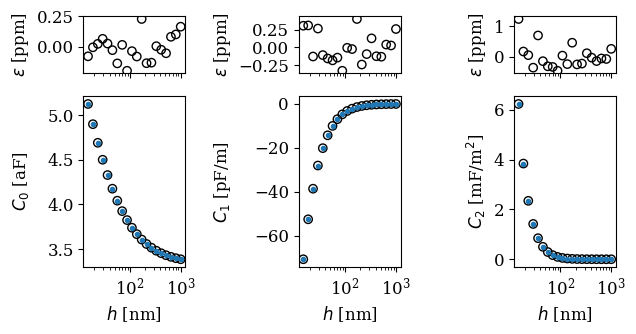

In [14]:
figs['1'] = compareCs()

# Define a sphere-cone object following Xu and co-workers

In [15]:
class XuObject(twodimCobject):

    def addtip(self, r, h, L, theta):

        # convert to nm and strip units
        h = h.to('nm').magnitude
        r = r.to('nm').magnitude 
        L = L.to('nm').magnitude

        # convert to radians
        thetar = np.radians(theta)

        dz = r**2/(2 * (r + h))
        d2 = h + r * (1 - np.sin(thetar))
        
        Nt = 3
        Nc = int(np.floor(np.sqrt((L - r) / dz)))
        Nz = Nt + Nc
        
        rj = np.zeros((Nz, 2))
        rj[0,:] = np.array([0, np.sqrt(2 * r * h + h**2)])
        rj[1,:] = np.array([0, h + r - dz])
        rj[2,:] = np.array([0, h + r])
        for k in np.arange(3, Nz):
            rj[k,0] = 0
            rj[k,1] = rj[k-1,1] + dz * (2 * k - 5)
        
        self.rj = rj

        Nr = Nz
        rk = np.zeros((Nr, 2))
        rk[0,:] = np.array([0, h])
        rk[1,:] = np.array([r * np.sin((np.pi/2 - thetar)/2), h + r * (1 - np.cos((np.pi/2 - thetar)/2))])
        rk[2,:] = np.array([r * np.cos(thetar), h + r * (1 - np.sin(thetar))])
        for k in np.arange(3, Nz):
            rk[k,1] = (rj[k,1] + rj[k-1,1])/2 
            rk[k,0] = r * np.cos(thetar) + (rk[k,1] - d2) * np.tan(thetar)

        self.rk = rk
        
        # save these
        self.info = {'type': 'sphere-tipped cone', 'r': r, 'h': h, 'L': L, 'theta': theta, 'Nz': Nz, 'Nr': Nr}
        self.title1 = f'sphere-tipped cone, $r$ = {r:0.1f} nm, $h$ = {h:0.1f} nm, ' \
            f'$L$ = {L:0.1f} nm, $\\theta$ = {theta:0.1f} deg, $N_r$ = {Nr:d}'
        self.title2 = ''

        # initialize the results, useful for plotting
        self.results = {
            'alpha': 0, 
            'q': np.ones(Nz),
            'S': np.ones(Nz),
            'Sinv': np.ones(Nz),
            'cn': 0, 
            'V': np.zeros(Nr),
            'C0': ureg.Quantity(0, 'F'),
            'C1': ureg.Quantity(0, 'F/m'),
            'C2': ureg.Quantity(0, 'F/m^2')}

Do the computation in Xu's supplementary information matlab code.

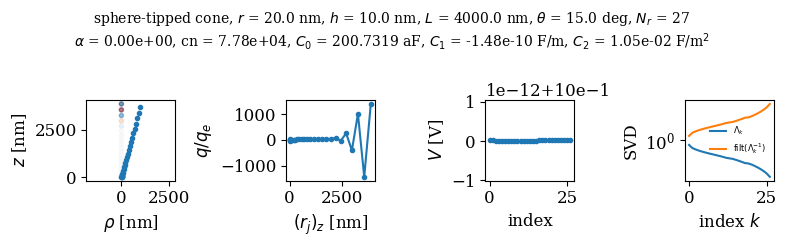

In [16]:
params = {'r': ureg.Quantity(20, 'nm'), # 20
          'h': ureg.Quantity(10, 'nm'), # 10
          'L': ureg.Quantity(4000, 'nm'), # 4000
          'theta': 15}

obj['2'] = XuObject()
obj['2'].addtip(**params)
obj['2'].response_metal()
obj['2'].solve()
_ = obj['2'].plot()

Why are the 0th and 2nd image charges negative?  Replot, zooming in to the first few points near the leading edge.

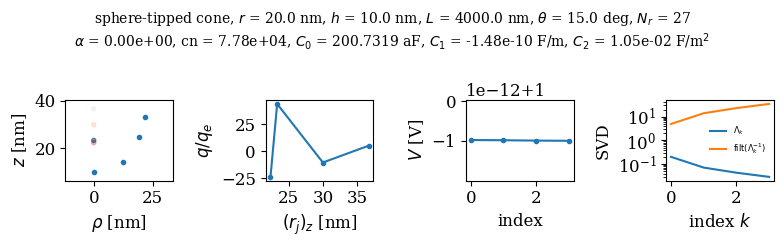

In [17]:
_ = obj['2'].plot(4,4)

With *just* the half sphere, the image charges are all positive, with the largest charge at the center of sphere.  This is what we expect.

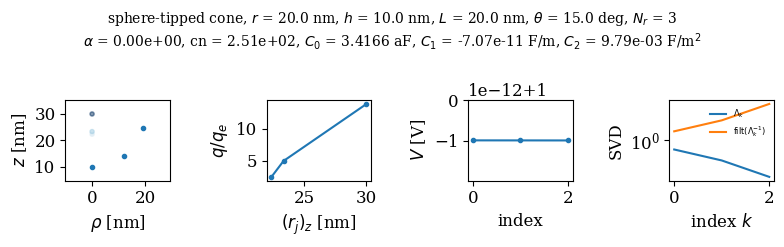

In [18]:
params = {'r': ureg.Quantity(20, 'nm'), # 20
          'h': ureg.Quantity(10, 'nm'), # 10
          'L': ureg.Quantity(20, 'nm'), # 4000
          'theta': 15}

obj['3a'] = XuObject()
obj['3a'].addtip(**params)
obj['3a'].response_metal()
obj['3a'].solve()
_ = obj['3a'].plot()

For comparison, do the calculation for a whole sphere.

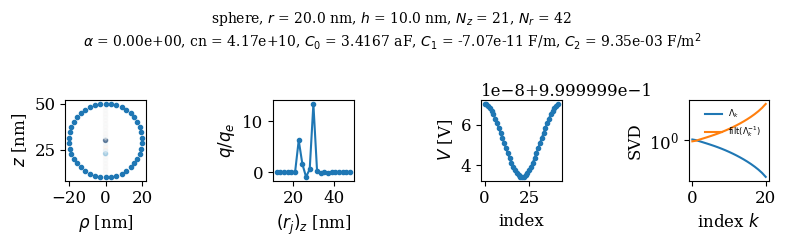

In [19]:
params = {'r': ureg.Quantity(20, 'nm'), 
          'h': ureg.Quantity(10, 'nm'), 
          'Nz': 21, 
          'Nr': 42}

obj['3b'] = twodimCobject()
obj['3b'].addsphere(**params)
obj['3b'].response_metal()
obj['3b'].solve()
_ = obj['3b'].plot()

Compare the two charge distibutions

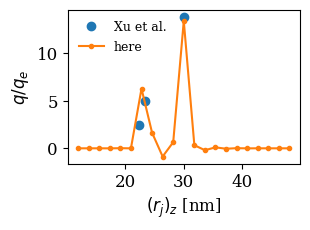

In [20]:
fig = plt.figure(figsize=(3,2.0))
plt.plot(obj['3a'].rj[:,1], obj['3a'].results['q'], 'o', label='Xu et al.')
plt.plot(obj['3b'].rj[:,1], obj['3b'].results['q'], '.-', label='here')
plt.xlabel('$(r_j)_{z}$ [nm]')
plt.ylabel('$q/q_{e}$')
plt.legend(loc=2, fontsize=9, frameon=False)
plt.show()

The difference in two the capacitances, in *parts per million*, is

In [21]:
1e6 * (obj['3a'].results['C0'] - obj['3b'].results['C0'])/obj['3b'].results['C0']

<Quantity(-25.433122139779506, 'dimensionless')>

This is a negligibly small difference.  

My image-charge parametrization, applied to a whole sphere, gives a capacitance comparable to Xu's method, applied to a half sphere.

# Compute the force on a sphere-cone over a metal

In Fig. 3 of Xu's manuscript, the authors plot normalized force $F/(\pi \epsilon_0 V^2)$ versus tip-sample separation $d/R$ for samples with various dielectric constants.  We want to reproduce their calculation for metal, with infinite dielectric constant, $\epsilon_{\mathrm{r}} = \infty$.

## First-pass simulation using Xu's approach

Carry out a simulation using the parameters given in the text and compute the force.

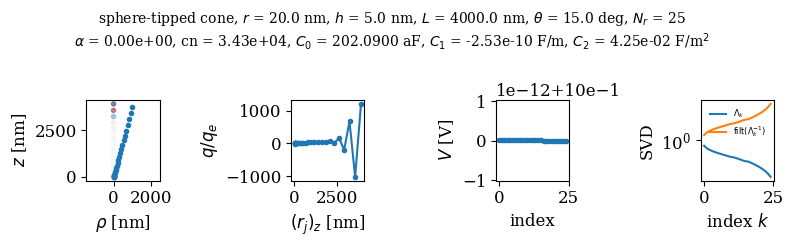

In [22]:
params = {'r': ureg.Quantity(20, 'nm'), # 20
          'h': ureg.Quantity(5, 'nm'), # 10
          'L': ureg.Quantity(4000, 'nm'), # 4000
          'theta': 15}

obj['4'] = XuObject()
obj['4'].addtip(**params)
obj['4'].response_metal()
obj['4'].solve()
_ = obj['4'].plot()

Compute the force, absolute and relative,

In [23]:
def force(obj, Vts=ureg.Quantity(1, 'V')):
    """Return the force in pN, and force relative to $\pi epsilon_0$."""
    
    F1 = (0.5 * obj.results['C1'] * Vts**2).to('pN').magnitude
    F2 = ((0.5 * obj.results['C1'])/(np.pi * epsilon0)).to('').magnitude

    return F1, F2

In [24]:
force(obj['4'])

(-126.69961414942944, -4.554877376910014)

## Compare to Hudlet's formula for the force

Create a function to compute the force using Hudlet's expressions for the force, as reported in Eqs. 15 in the Xu manuscript.

In [25]:
def forceHudlet(obj, Vts=ureg.Quantity(1, 'V')):
    """Return the force in pN, and force relative to $\pi epsilon_0$."""

    R = obj.info['r']
    d = obj.info['h']
    L = obj.info['L']
    theta = np.radians(obj.info['theta'])
    
    pre = np.pi * epsilon0 * Vts**2
    
    f_apex = - (R**2 * (1 - np.sin(theta)))/(d * (d + R * (1 - np.sin(theta))))
    f_cone = - np.power(np.log(np.tan(theta/2)), -2.0) * np.log(L / d)

    F1 = (pre * (f_apex + f_cone)).to('pN').magnitude
    F2 = f_apex + f_cone

    return F1, F2

In [26]:
forceHudlet(obj['4'])

(-128.43002645239125, -4.617086057689354)

## Repeat the calculation

Now make simulation comparable to the one in Figure 3 of Xu.  

### Decide on the correct tip dimensions

Frustratingly, Xu and coworkers report contradictory information on the simulation parameters used in the Figure 3 simulation.  In the text the authors say "... shown by the continuous lines in Fig. 3 (the negative sign denotes the force is attractive), with tip geometries $R = 20 \: \mathrm{nm}$, $l = 4 \: \mu\mathrm{m}$ and $\theta = 15^{\circ}$ used throughout the calculations". Yet in Fig. 3 the tip-cone length is labeled as $3 R$, which is $3 \times 20 \: \mathrm{nm} = 60 \: \mathrm{nm}$, not the $4 \: \mu\mathrm{m}$ implied by the text.

The closest tip-sample separation shown in Fig. 3 is $d/R = 0.25$, corresponding to $d = 0.25 R = 5 \: \mathrm{nm}$.  

Use **Hudlet's analytical formula** to carry out two force calculations, one with $l = 4 \: \mu\mathrm{m}$ and another one with $l = 60 \: \mathrm{nm}$, and compare the results to the metal-sample case in Xu's Fig. 3.  In Fig. 3, Xu and coworkers report the normalized force as $F/(\pi \epsilon_0 V^2) = -4.6$ at a tip-sample separation of $d/R = 0.25$.

### Simulation 1 ($L = 4 \: \mu\mathrm{m}$ cone)

In [27]:
params = {'r': ureg.Quantity(20, 'nm'), # 20
          'h': ureg.Quantity(5, 'nm'), # 10
          'L': ureg.Quantity(4000, 'nm'), # 4000
          'theta': 15}

obj['5a'] = XuObject()
obj['5a'].addtip(**params)
obj['5a'].response_metal()
obj['5a'].solve()

print("Hudlet F calc ([pN], normalized) = {:}".format(forceHudlet(obj['5a'])))
print("       F comp ([pN], normalized) = {:}".format(force(obj['5a'])))


Hudlet F calc ([pN], normalized) = (-128.43002645239125, -4.617086057689354)
       F comp ([pN], normalized) = (-126.69961414942944, -4.554877376910014)


Observations

* Hudlet predicts a normalized force of $-4.6$, in excellent agreement with Xu's $-4.6$.
* My numerically calculated force also agrees well with Xu.

### Simulation 2 ($L = 60 \: \mathrm{nm}$ cone)

In [28]:
params = {'r': ureg.Quantity(20, 'nm'), # 20
          'h': ureg.Quantity(5, 'nm'), # 10
          'L': ureg.Quantity(60, 'nm'), # 4000
          'theta': 15}

obj['5b'] = XuObject()
obj['5b'].addtip(**params)
obj['5b'].response_metal()
obj['5b'].solve()

print("Hudlet F calc ([pN], normalized) = {:}".format(forceHudlet(obj['5b'])))
print("       F comp ([pN], normalized) = {:}".format(force(obj['5b'])))

Hudlet F calc ([pN], normalized) = (-100.01439166393331, -3.5955381002043785)
       F comp ([pN], normalized) = (-93.96402769193926, -3.3780262619630683)


Observations

* Hudlet predicts a normalized force of $-3.6$, in poor agreement with Xu's $-4.6$.
* My numerically calculated force agrees poorly with Xu.

## Conclusions

1. Xu used a $L = 4 \: \mu\mathrm{m}$ long cone in their Figs. 3 simulations.
2. Hudlet agrees with Xu's Fig. 3 force at small tip-sample separation.
3. My numerical results agree with Xu's Fig. 3 force at small tip-sample separation.

# Compare to Xu Fig. 3

In this section I reproduce Xu's Fig. 3 plot of force versus tip-sample separation for a sphere-cone over a metal and, for comparison, plot the force predicted by my numerical model. 

Xu's results were plotted by extracting the Fig. 3 $\epsilon_{\mathrm{r}} = \infty$ data using the WebPlotDigitizer program ([link](https://apps.automeris.io/wpd4/)), saving the resulting data to a `.csv` file, and importing this `.csv` file into this notebook.

In [29]:
Fig3data = pd.read_csv('Xu2019oct--Fig-3--metal.csv', names=['h/r', 'Fnorm'])

Convert the $h/r$ values obtained from $x$-axis data into an array of $h$ values by multipling Xu's $x$-axis data by the tip radius, $r = 20 \: \mathrm{nm}$.

In [30]:
r = ureg.Quantity(20, 'nm')
h_array = np.array(Fig3data['h/r']) * r

Loop over the array of $h$ values.  At each $h$, use Xu's algorithm to compute the capacitance $C_0$ and capacitance first and second derivatives $C_1$ and $C_2$. The sphere-cone parameters are

* radius $r = 20 \: \mathrm{nm}$, 
* tip-sample separation $h$ is variable, 
* cone height $L = 4 \: \mu\mathrm{m}$, and
* cone angle $\theta = 16^{\circ}$.

Assuming a tip-sample bias of $V_{\mathrm{ts}} = 1 \: \mathrm{V}$, use $C_1$ to compute the normalized force acting on the tip, $F_{\mathrm{norm}} = F/\pi \epsilon_0 V_{\mathrm{ts}}^2$.  

In [31]:
comp = {}

f = np.zeros_like(h_array)
for key, unit in zip(['C0', 'C1', 'C2'], ['aF', 'pF/m', 'mF/m^2']):
    comp[key] = ureg.Quantity(np.zeros_like(h_array), unit)

for index, h in enumerate(h_array):

    params = {'r': r,
              'h': h,
              'L': ureg.Quantity(4000, 'nm'), 
              'theta': 15}

    obj['6'] = XuObject()
    obj['6'].addtip(**params)
    obj['6'].response_metal()
    obj['6'].solve()
    
    (_, f[index]) = force(obj['6'], Vts=ureg.Quantity(1, 'V')) 
    for key in ['C0', 'C1', 'C2']:
        comp[key][index] = obj['1'].results[key]

Examine the charge density and voltage at the largest $h$ in the simulation.  We see that the ti voltage is equal to $1 \: \mathrm{V}$ everywhere, to within a fractional error of $2 \times 10^{-11}$.  The tip image charges are largest near the leading edge, except at the top of the cone where they show large oscillations. 

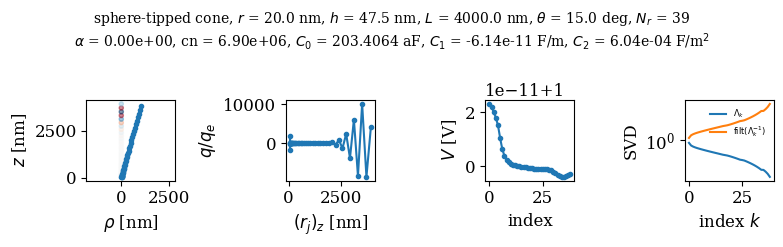

In [32]:
_ = obj['6'].plot()

The following figure shows a zoomed-in plot of the image charges near the leading edge. Surprisingly, the first charge and third charges are are negative, while the second charge is positive.

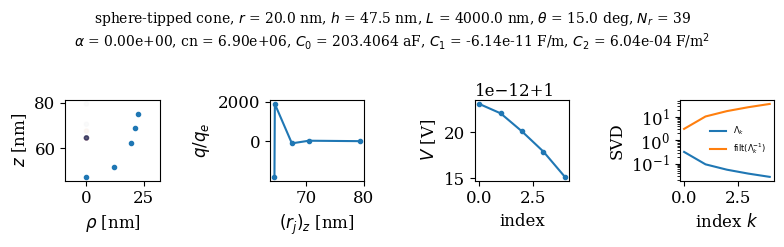

In [33]:
_ = obj['6'].plot(5,5)

Print out the first few images charges.

In [34]:
dg = pd.DataFrame.from_dict(
    {'$(r_j)_z$ [nm]': obj['6'].rj[0:5,1],
        '$q_{j}/q_e$': obj['6'].results['q'][0:5]})

markdown_table = dg.to_markdown()
display(Markdown(markdown_table))

|    |   $(r_j)_z$ [nm] |   $q_{j}/q_e$ |
|---:|-----------------:|--------------:|
|  0 |          64.5089 |   -1807.9     |
|  1 |          64.5768 |    1893.35    |
|  2 |          67.5381 |    -106.44    |
|  3 |          70.4994 |      26.8099  |
|  4 |          79.3833 |       4.43811 |

Plot Xu's normalized force (empty circles) and my calculated normalized force (filled circles, line) verus $h/r$.  The two calculations agree to within $0.25$%, a reasonable number given the finite resolution of the  WebPlotDigitizer program.

In [35]:
#| fig-cap: | 
#|  Xu's normalized force (empty circles) and my calculated normalized force 
#|  (filled circles, line) verus tip-sample separation.

def fig3compare():

    x1 = Fig3data['h/r']
    y1 = Fig3data['Fnorm']
    x2 =(h_array/r).to('').magnitude
    y2 = f

    fig, (ax1, ax2) = plt.subplots(2, 1,
        figsize=(3.0, 3.5),
        sharex=True, 
        gridspec_kw={'height_ratios': [1, 3]}) 

    opts1 = {'marker': 'o', 'facecolors': 'none', 'edgecolors': 'black'}
    opts2 = {'marker': '.'}

    ax1.scatter(x1, (y2-y1)/y2, **opts1)
    ax2.scatter(x1, y1, **opts1)
    ax2.scatter(x2, y2, **opts2)
    ax2.plot(x2, y2, '--')

    ax1.set_ylabel('residuals')
    ax2.set_ylabel('norm. force $F / \pi \epsilon_0 V^2$')
    ax2.set_xlabel('norm. separation $h/r$')

    fig.align_ylabels()
    fig.tight_layout()

    return fig

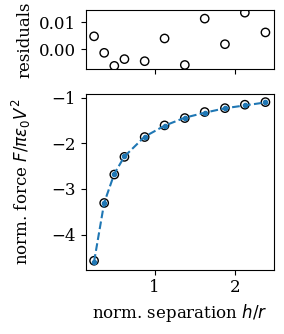

In [36]:
figs['2'] = fig3compare()

::: {.content-hidden when-format="html"}

# Save the figures

In [37]:
if 1:
    for num in figs.keys():
        figname = THIS + "Fig-" + num
        figs[num].savefig(figname + '.png', dpi=300)
        figs[num].savefig(figname + '.pdf')

:::

::: {.content-hidden when-format="html"}

# Formatting notes

The header at the top of this file is for creating a nicely-formatted `.html` and `.pdf` documents using the program `quarto` ([link](https://quarto.org/)).  To create nicely-formated `.html` and `.pdf` versions of this notebook, run `quarto` from the command line as follows

    quarto render dissipation-theory--Study-33.ipynb 

Other useful information about this notebook:

- Filename: `dissipation-theory--Study-33.ipynb`
- Continued from: `dissipation-theory--Study-32.ipynb`
- Continued to: ---

:::